# 10 Minutes to pandas
from [https://pandas.pydata.org/pandas-docs/version/0.22/10min.html]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object Creation

In [2]:
a = pd.Series([1,3,5,np.nan,6,8])
a

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.123422,0.229069,0.257652,-0.761936
2013-01-02,0.256881,0.456745,0.723177,0.055202
2013-01-03,-1.719377,0.358267,-1.621852,0.357911
2013-01-04,1.282448,-0.419015,-2.248498,-2.453066
2013-01-05,0.957280,-1.163067,0.531942,-1.336266
2013-01-06,1.101656,0.086780,0.007885,1.008458


In [5]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20130101'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(['test', 'train', 'test', 'train']),
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-01,1.0,3,test,foo
1,1.0,2013-01-01,1.0,3,train,foo
2,1.0,2013-01-01,1.0,3,test,foo
3,1.0,2013-01-01,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [7]:
df.head(2)

,A,B,C,D
2013-01-01,-0.123422,0.229069,0.257652,-0.761936
2013-01-02,0.256881,0.456745,0.723177,0.055202


In [8]:
df.tail(2)

,A,B,C,D
2013-01-05,0.957280,-1.163067,0.531942,-1.336266
2013-01-06,1.101656,0.086780,0.007885,1.008458


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[-0.12342169,  0.22906899,  0.25765227, -0.76193579],
       [ 0.25688098,  0.45674508,  0.72317743,  0.05520196],
       [-1.71937697,  0.35826717, -1.62185206,  0.35791124],
       [ 1.28244765, -0.41901528, -2.24849837, -2.45306562],
       [ 0.95727995, -1.16306671,  0.53194212, -1.33626612],
       [ 1.10165624,  0.08678006,  0.00788461,  1.00845772]])

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.292578,-0.075203,-0.391616,-0.521616
std,1.122370,0.615035,1.235991,1.256926
min,-1.719377,-1.163067,-2.248498,-2.453066
25%,-0.028346,-0.292566,-1.214418,-1.192684
50%,0.607080,0.157925,0.132768,-0.353367
75%,1.065562,0.325968,0.463370,0.282234
max,1.282448,0.456745,0.723177,1.008458


In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.123422,0.256881,-1.719377,1.282448,0.957280,1.101656
B,0.229069,0.456745,0.358267,-0.419015,-1.163067,0.086780
C,0.257652,0.723177,-1.621852,-2.248498,0.531942,0.007885
D,-0.761936,0.055202,0.357911,-2.453066,-1.336266,1.008458


In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.761936,0.257652,0.229069,-0.123422
2013-01-02,0.055202,0.723177,0.456745,0.256881
2013-01-03,0.357911,-1.621852,0.358267,-1.719377
2013-01-04,-2.453066,-2.248498,-0.419015,1.282448
2013-01-05,-1.336266,0.531942,-1.163067,0.957280
2013-01-06,1.008458,0.007885,0.086780,1.101656


In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,0.957280,-1.163067,0.531942,-1.336266
2013-01-04,1.282448,-0.419015,-2.248498,-2.453066
2013-01-06,1.101656,0.086780,0.007885,1.008458
2013-01-01,-0.123422,0.229069,0.257652,-0.761936
2013-01-03,-1.719377,0.358267,-1.621852,0.357911
2013-01-02,0.256881,0.456745,0.723177,0.055202


## Selection

**Note**: While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, **.at, .iat, .loc, .iloc and .ix**.

### Getting

In [16]:
df['A']

2013-01-01   -0.123422
2013-01-02    0.256881
2013-01-03   -1.719377
2013-01-04    1.282448
2013-01-05    0.957280
2013-01-06    1.101656
Freq: D, Name: A, dtype: float64

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,-0.123422,0.229069,0.257652,-0.761936
2013-01-02,0.256881,0.456745,0.723177,0.055202
2013-01-03,-1.719377,0.358267,-1.621852,0.357911


In [18]:
df['20130101': '20160101']

,A,B,C,D
2013-01-01,-0.123422,0.229069,0.257652,-0.761936
2013-01-02,0.256881,0.456745,0.723177,0.055202
2013-01-03,-1.719377,0.358267,-1.621852,0.357911
2013-01-04,1.282448,-0.419015,-2.248498,-2.453066
2013-01-05,0.957280,-1.163067,0.531942,-1.336266
2013-01-06,1.101656,0.086780,0.007885,1.008458


### Selection by Label

In [19]:
df.loc[dates[0]]

A   -0.123422
B    0.229069
C    0.257652
D   -0.761936
Name: 2013-01-01 00:00:00, dtype: float64

In [20]:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.123422,0.229069
2013-01-02,0.256881,0.456745
2013-01-03,-1.719377,0.358267
2013-01-04,1.282448,-0.419015
2013-01-05,0.957280,-1.163067
2013-01-06,1.101656,0.086780


In [21]:
df.loc['20130101': '20160101', ['A', 'B']]

,A,B
2013-01-01,-0.123422,0.229069
2013-01-02,0.256881,0.456745
2013-01-03,-1.719377,0.358267
2013-01-04,1.282448,-0.419015
2013-01-05,0.957280,-1.163067
2013-01-06,1.101656,0.086780


In [22]:
df.loc['20130101', ['A', 'B']]

A   -0.123422
B    0.229069
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
df.loc[dates[0], 'A']

-0.12342168609556305

In [24]:
df.at[dates[0], 'A']  # fast access

-0.12342168609556305

### Selection by Position

In [25]:
df.iloc[3]

A    1.282448
B   -0.419015
C   -2.248498
D   -2.453066
Name: 2013-01-04 00:00:00, dtype: float64

In [26]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.282448,-0.419015
2013-01-05,0.957280,-1.163067


In [27]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.256881,0.723177
2013-01-03,-1.719377,-1.621852
2013-01-05,0.957280,0.531942


In [28]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.256881,0.456745,0.723177,0.055202
2013-01-03,-1.719377,0.358267,-1.621852,0.357911


In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.229069,0.257652
2013-01-02,0.456745,0.723177
2013-01-03,0.358267,-1.621852
2013-01-04,-0.419015,-2.248498
2013-01-05,-1.163067,0.531942
2013-01-06,0.086780,0.007885


In [30]:
df.iloc[1,1]

0.4567450765986521

In [31]:
df.iat[1,1]  # fast access

0.4567450765986521

### Boolean Indexing

In [32]:
df[df.B > 0]

,A,B,C,D
2013-01-01,-0.123422,0.229069,0.257652,-0.761936
2013-01-02,0.256881,0.456745,0.723177,0.055202
2013-01-03,-1.719377,0.358267,-1.621852,0.357911
2013-01-06,1.101656,0.086780,0.007885,1.008458


In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.229069,0.257652,NaN
2013-01-02,0.256881,0.456745,0.723177,0.055202
2013-01-03,NaN,0.358267,NaN,0.357911
2013-01-04,1.282448,NaN,NaN,NaN
2013-01-05,0.957280,NaN,0.531942,NaN
2013-01-06,1.101656,0.086780,0.007885,1.008458


In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.123422,0.229069,0.257652,-0.761936,one
2013-01-02,0.256881,0.456745,0.723177,0.055202,one
2013-01-03,-1.719377,0.358267,-1.621852,0.357911,two
2013-01-04,1.282448,-0.419015,-2.248498,-2.453066,three
2013-01-05,0.957280,-1.163067,0.531942,-1.336266,four
2013-01-06,1.101656,0.086780,0.007885,1.008458,three


In [35]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,-1.719377,0.358267,-1.621852,0.357911,two
2013-01-05,0.957280,-1.163067,0.531942,-1.336266,four


In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130101', periods=6))
s1

2013-01-01    1
2013-01-02    2
2013-01-03    3
2013-01-04    4
2013-01-05    5
2013-01-06    6
Freq: D, dtype: int64

### Setting

In [37]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.123422,0.229069,0.257652,-0.761936,1
2013-01-02,0.256881,0.456745,0.723177,0.055202,2
2013-01-03,-1.719377,0.358267,-1.621852,0.357911,3
2013-01-04,1.282448,-0.419015,-2.248498,-2.453066,4
2013-01-05,0.957280,-1.163067,0.531942,-1.336266,5
2013-01-06,1.101656,0.086780,0.007885,1.008458,6


In [38]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.229069,0.257652,-0.761936,1
2013-01-02,0.256881,0.456745,0.723177,0.055202,2
2013-01-03,-1.719377,0.358267,-1.621852,0.357911,3
2013-01-04,1.282448,-0.419015,-2.248498,-2.453066,4
2013-01-05,0.957280,-1.163067,0.531942,-1.336266,5
2013-01-06,1.101656,0.086780,0.007885,1.008458,6


In [39]:
df.iat[0, 1] = 1
df

,A,B,C,D,F
2013-01-01,0.000000,1.000000,0.257652,-0.761936,1
2013-01-02,0.256881,0.456745,0.723177,0.055202,2
2013-01-03,-1.719377,0.358267,-1.621852,0.357911,3
2013-01-04,1.282448,-0.419015,-2.248498,-2.453066,4
2013-01-05,0.957280,-1.163067,0.531942,-1.336266,5
2013-01-06,1.101656,0.086780,0.007885,1.008458,6


In [40]:
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,1.000000,0.257652,5,1
2013-01-02,0.256881,0.456745,0.723177,5,2
2013-01-03,-1.719377,0.358267,-1.621852,5,3
2013-01-04,1.282448,-0.419015,-2.248498,5,4
2013-01-05,0.957280,-1.163067,0.531942,5,5
2013-01-06,1.101656,0.086780,0.007885,5,6


In [41]:
df2 = df.copy()
df2[df2 > 0] =- df2
df2

,A,B,C,D,F
2013-01-01,0.000000,-1.000000,-0.257652,-5,-1
2013-01-02,-0.256881,-0.456745,-0.723177,-5,-2
2013-01-03,-1.719377,-0.358267,-1.621852,-5,-3
2013-01-04,-1.282448,-0.419015,-2.248498,-5,-4
2013-01-05,-0.957280,-1.163067,-0.531942,-5,-5
2013-01-06,-1.101656,-0.086780,-0.007885,-5,-6


## Missing Data

In [42]:
df1 = df.reindex(index=dates[:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]: dates[1], 'E'] = 2
df1

,A,B,C,D,F,E
2013-01-01,0.000000,1.000000,0.257652,5,1,2.0
2013-01-02,0.256881,0.456745,0.723177,5,2,2.0
2013-01-03,-1.719377,0.358267,-1.621852,5,3,NaN
2013-01-04,1.282448,-0.419015,-2.248498,5,4,NaN


In [43]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-01,0.000000,1.000000,0.257652,5,1,2.0
2013-01-02,0.256881,0.456745,0.723177,5,2,2.0


In [44]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,1.000000,0.257652,5,1,2.0
2013-01-02,0.256881,0.456745,0.723177,5,2,2.0
2013-01-03,-1.719377,0.358267,-1.621852,5,3,5.0
2013-01-04,1.282448,-0.419015,-2.248498,5,4,5.0


In [45]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,False,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats

In [46]:
df.mean()

A    0.313148
B    0.053285
C   -0.391616
D    5.000000
F    3.500000
dtype: float64

In [47]:
df.mean(1)

2013-01-01    1.451530
2013-01-02    1.687361
2013-01-03    1.003408
2013-01-04    1.522987
2013-01-05    2.065231
2013-01-06    2.439264
Freq: D, dtype: float64

In [48]:
s = pd.Series([1,3,6,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    6.0
2013-01-06    NaN
Freq: D, dtype: float64

In [49]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.719377,-0.641733,-2.621852,4.0,2.0
2013-01-04,-1.717552,-3.419015,-5.248498,2.0,1.0
2013-01-05,-5.042720,-7.163067,-5.468058,-1.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

In [50]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,1.000000,0.257652,5,1
2013-01-02,0.256881,1.456745,0.980830,10,3
2013-01-03,-1.462496,1.815012,-0.641022,15,6
2013-01-04,-0.180048,1.395997,-2.889521,20,10
2013-01-05,0.777232,0.232930,-2.357579,25,15
2013-01-06,1.878888,0.319710,-2.349694,30,21


In [51]:
df.apply(lambda x: x.max() - x.min())

A    3.001825
B    2.163067
C    2.971676
D    0.000000
F    5.000000
dtype: float64

### Histogramming

In [52]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    1
2    4
3    6
4    2
5    0
6    0
7    4
8    2
9    5
dtype: int64

In [53]:
s.value_counts()

0    3
4    2
2    2
6    1
5    1
1    1
dtype: int64

### String Methods

In [54]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [55]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.744801,1.034728,-1.463151,0.177995
1,0.085314,0.234164,-1.371220,-1.661052
2,1.282667,0.886330,0.123359,1.529206
3,0.055846,0.165927,-0.337586,0.996370
4,-0.347485,1.932467,0.776349,1.438332
5,0.692557,0.386793,-0.239791,-1.145975
6,1.356021,0.203032,-0.566681,-0.579421
7,-0.211284,0.524643,-1.370467,0.548306
8,-1.403617,0.033895,-0.938586,1.260907
9,-0.194504,0.879811,-0.418206,-0.852180


In [56]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.744801,1.034728,-1.463151,0.177995
1,0.085314,0.234164,-1.371220,-1.661052
2,1.282667,0.886330,0.123359,1.529206
3,0.055846,0.165927,-0.337586,0.996370
4,-0.347485,1.932467,0.776349,1.438332
5,0.692557,0.386793,-0.239791,-1.145975
6,1.356021,0.203032,-0.566681,-0.579421
7,-0.211284,0.524643,-1.370467,0.548306
8,-1.403617,0.033895,-0.938586,1.260907
9,-0.194504,0.879811,-0.418206,-0.852180


### Join

In [57]:
left = pd.DataFrame({
    'key': ['foo', 'foo'],
    'lval': [1,2]
})
right = pd.DataFrame({
    'key': ['foo', 'foo'],
    'rval': [4,5]
})
right

,key,rval
0,foo,4
1,foo,5


In [58]:
pd.merge(left, right, on='key')  # SQL style merge

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [59]:
left = pd.DataFrame({
    'key': ['foo', 'bar'],
    'lval': [1,2]
})
right = pd.DataFrame({
    'key': ['foo', 'bar'],
    'rval': [4,5]
})
right

,key,rval
0,foo,4
1,bar,5


In [60]:
pd.merge(left, right, on='key')  # SQL style merge

,key,lval,rval
0,foo,1,4
1,bar,2,5


### Append

In [61]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,1.118764,-0.641152,0.618639,-0.651322
1,1.461676,-0.635964,1.068989,-0.799803
2,-0.006335,0.995795,1.326355,0.355083
3,0.131062,1.290722,-0.011871,-0.151365
4,1.419915,0.976151,0.957869,-2.417763
5,-0.745495,-0.649264,-0.662627,0.083388
6,-1.775316,0.471926,0.857014,-0.679664
7,0.915923,0.195328,1.370453,-0.437712


In [62]:
df.append(df.iloc[3], ignore_index=True)

,A,B,C,D
0,1.118764,-0.641152,0.618639,-0.651322
1,1.461676,-0.635964,1.068989,-0.799803
2,-0.006335,0.995795,1.326355,0.355083
3,0.131062,1.290722,-0.011871,-0.151365
4,1.419915,0.976151,0.957869,-2.417763
5,-0.745495,-0.649264,-0.662627,0.083388
6,-1.775316,0.471926,0.857014,-0.679664
7,0.915923,0.195328,1.370453,-0.437712
8,0.131062,1.290722,-0.011871,-0.151365


## Grouping

In [63]:
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,-0.083877,-1.107280
1,bar,one,0.860963,1.000849
2,foo,two,1.384029,0.079763
3,bar,three,1.089964,-0.330385
4,foo,two,-2.165534,0.664253
5,bar,two,0.774156,1.179928
6,foo,one,0.305797,1.215113
7,foo,three,-0.122819,-0.307686


In [64]:
df.groupby('A').sum()

,C,D
A,,
bar,2.725084,1.850391
foo,-0.682404,0.544164


In [65]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.860963  1.000849
    three  1.089964 -0.330385
    two    0.774156  1.179928
foo one    0.221919  0.107833
    three -0.122819 -0.307686
    two   -0.781504  0.744017

## Reshaping

### Stack

In [66]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.203346 -2.208277
      two     2.585624 -0.848358
baz   one     0.526780 -1.315746
      two     0.378107  0.577457
foo   one    -1.104226  1.235135
      two    -0.513045 -0.026467
qux   one     1.157919 -0.844174
      two    -0.074636 -0.545026

In [67]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.203346 -2.208277
      two     2.585624 -0.848358
baz   one     0.526780 -1.315746
      two     0.378107  0.577457

In [68]:
stacked = df2.stack()  # compresses a level in the dataframe's columns
stacked

first  second   
bar    one     A   -0.203346
               B   -2.208277
       two     A    2.585624
               B   -0.848358
baz    one     A    0.526780
               B   -1.315746
       two     A    0.378107
               B    0.577457
dtype: float64

In [69]:
stacked.unstack()

A         B
first second                    
bar   one    -0.203346 -2.208277
      two     2.585624 -0.848358
baz   one     0.526780 -1.315746
      two     0.378107  0.577457

In [70]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.203346  2.585624
      B -2.208277 -0.848358
baz   A  0.526780  0.378107
      B -1.315746  0.577457

In [71]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.203346  0.526780
       B -2.208277 -1.315746
two    A  2.585624  0.378107
       B -0.848358  0.577457

### Time Series

In [72]:
rng = pd.date_range('1/1/2012', periods=6, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    983
Freq: 5T, dtype: int64

In [73]:
ts.tz_localize('US/Eastern')

2012-01-01 00:00:00-05:00     19
2012-01-01 00:00:01-05:00    183
2012-01-01 00:00:02-05:00      3
2012-01-01 00:00:03-05:00    258
2012-01-01 00:00:04-05:00    178
2012-01-01 00:00:05-05:00    342
Freq: S, dtype: int64

In [74]:
ps = ts.to_period()
ps

2012-01-01 00:00:00     19
2012-01-01 00:00:01    183
2012-01-01 00:00:02      3
2012-01-01 00:00:03    258
2012-01-01 00:00:04    178
2012-01-01 00:00:05    342
Freq: S, dtype: int64

In [75]:
ps.to_timestamp()

2012-01-01 00:00:00     19
2012-01-01 00:00:01    183
2012-01-01 00:00:02      3
2012-01-01 00:00:03    258
2012-01-01 00:00:04    178
2012-01-01 00:00:05    342
Freq: S, dtype: int64

In [76]:
prng = pd.period_range('1991Q1', '2000Q4', freq='Q-DEC')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 0).asfreq('H', 's') + 9
ts.head()

1991-03-01 09:00   -0.638485
1991-06-01 09:00    0.204532
1991-09-01 09:00    0.358445
1991-12-01 09:00    2.038824
1992-03-01 09:00    1.496749
Freq: H, dtype: float64

## Categoricals

In [77]:
df = pd.DataFrame({
    'id': [1,2,3,4,5,6],
    'raw_grade': ['a', 'b', 'b', 'a', 'a', 'e']
})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [78]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [79]:
df.grade.cat.categories = ['very good', 'good', 'very bad']
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [80]:
df.grade = df.grade.cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df.grade

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [81]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [82]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

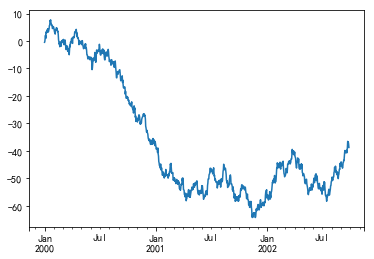

In [83]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

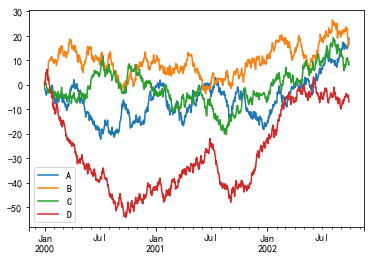

In [87]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

df.plot()
plt.legend(loc='best')

## Getting Data In/Out

### CSV

In [88]:
df.to_csv('foo.csv')

In [91]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.295671,1.109880,0.670730,-0.430146
1,2000-01-02,-1.472872,0.217701,0.958414,0.760760
2,2000-01-03,-2.326770,1.667657,0.145929,1.210629
3,2000-01-04,-2.335116,2.558685,0.516553,1.469702
4,2000-01-05,-3.269694,4.176827,0.281277,3.564642


### hdf5

In [92]:
df.to_hdf('foo.h5', 'df')
pd.read_hdf('foo.h5', 'df').head()

,A,B,C,D
2000-01-01,-1.295671,1.109880,0.670730,-0.430146
2000-01-02,-1.472872,0.217701,0.958414,0.760760
2000-01-03,-2.326770,1.667657,0.145929,1.210629
2000-01-04,-2.335116,2.558685,0.516553,1.469702
2000-01-05,-3.269694,4.176827,0.281277,3.564642


### Excel

In [94]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,A,B,C,D
2000-01-01,-1.295671,1.109880,0.670730,-0.430146
2000-01-02,-1.472872,0.217701,0.958414,0.760760
2000-01-03,-2.326770,1.667657,0.145929,1.210629
2000-01-04,-2.335116,2.558685,0.516553,1.469702
2000-01-05,-3.269694,4.176827,0.281277,3.564642
